In [4]:
# HR data analytics to predict employee retention rate

import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np

In [10]:
employee = pd.read_csv('HR_comma_sep.csv', index_col = False)

In [8]:
employee

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157.0,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262.0,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272.0,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223.0,5.0,0.0,1.0,0.0,sales,low
4,0.37,0.52,2.0,159.0,3.0,0.0,1.0,0.0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2.0,151.0,3.0,0.0,1.0,0.0,support,low
14995,0.37,0.48,2.0,160.0,3.0,0.0,1.0,0.0,support,low
14996,0.37,0.53,2.0,143.0,3.0,0.0,1.0,0.0,support,low
14997,0.11,0.96,6.0,280.0,4.0,0.0,1.0,0.0,support,low


In [14]:
employee.isna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
14994,False,False,False,False,False,False,False,False,False,False
14995,False,False,False,False,False,False,False,False,False,False
14996,False,False,False,False,False,False,False,False,False,False
14997,False,False,False,False,False,False,False,False,False,False


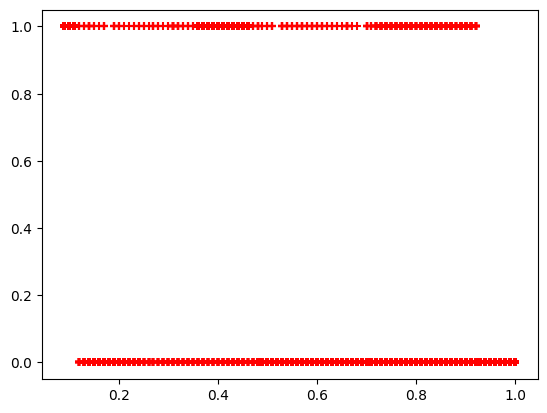

In [49]:
plt.scatter(employee.satisfaction_level, employee.left,  marker= '+', color= 'red')
plt.show()

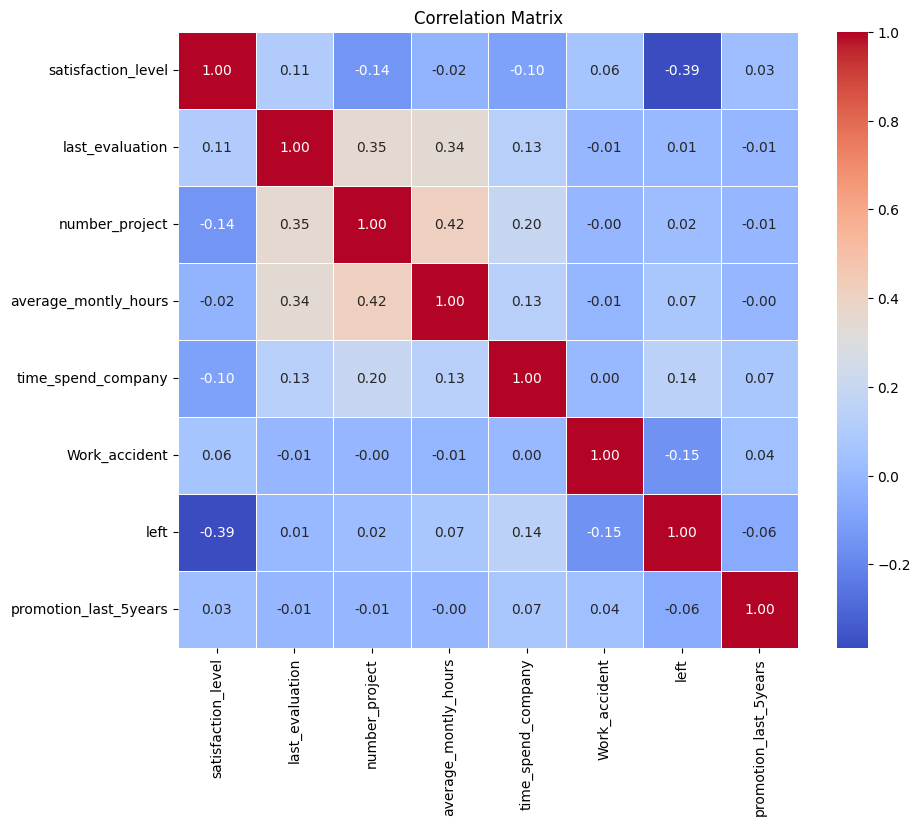

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = numeric_data.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


In [65]:
# Calculation correlation between independent variables and target variable(left), 
# To identify, which independent variable has the strongest reln with target variable 

numeric_data = employee.select_dtypes(include=['number'])

# Step 1: Calculate correlations for all numeric columns
correlation_matrix = numeric_data.corr()

#Step 2: Extract correlations with the target variable 'left'
correlation_with_left = correlation_matrix['left']

# Step 3: Sort correlations by their strength
sorted_correlations = correlation_with_left.sort_values(ascending=False)

sorted_correlations

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

In [67]:
# Satisfaction_level has the highest correlation of -0.38 with target variable 'Left'
# This feature is the most important aspect to decide, whether an employee will leave the company or not

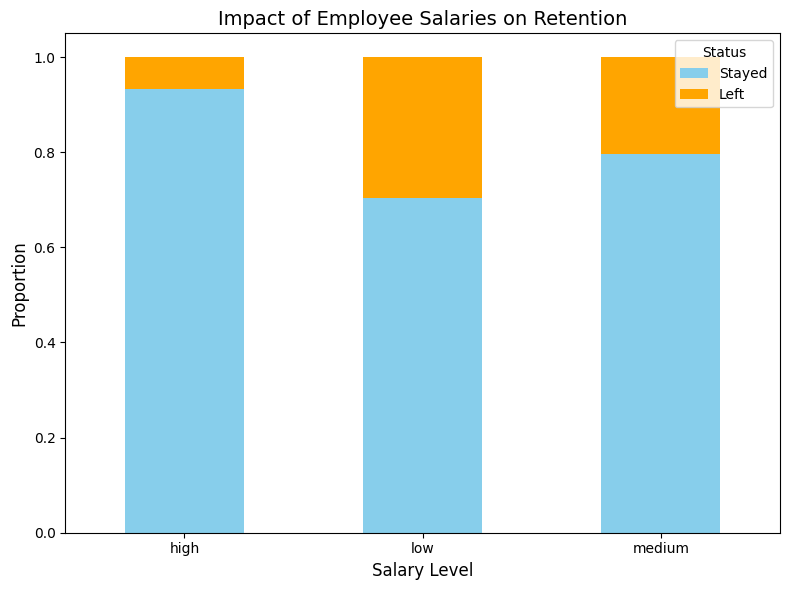

In [69]:
# Plot a bar graph showing impact of employee salary on retention rate

import matplotlib.pyplot as plt

# Group data by salary and calculate retention and attrition rates
salary_groups = employee.groupby('salary')['left'].value_counts(normalize=True).unstack()

# Plot bar charts
fig, ax = plt.subplots(figsize=(8, 6))
salary_groups.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)

# Customize plot
ax.set_title('Impact of Employee Salaries on Retention', fontsize=14)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_xlabel('Salary Level', fontsize=12)
ax.legend(['Stayed', 'Left'], title='Status', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()


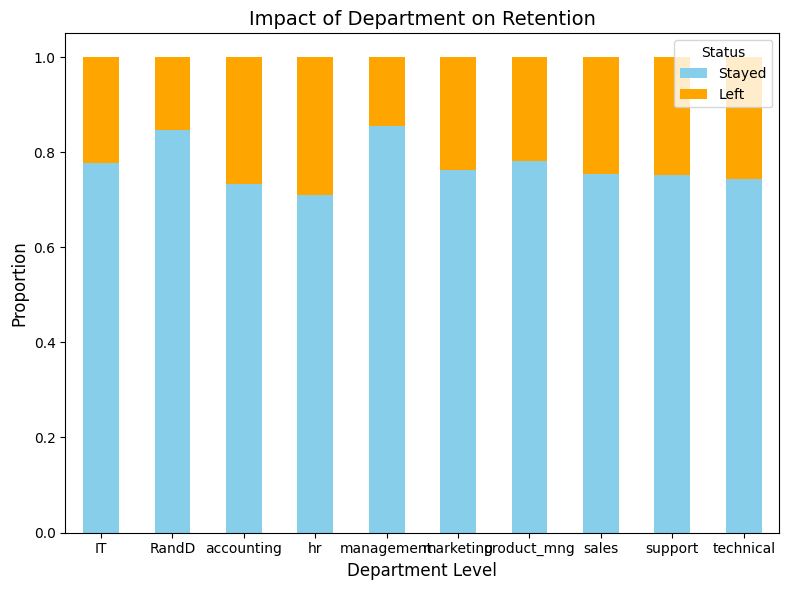

In [74]:
# Plot bar charts showing corelation between department and employee retention

import matplotlib.pyplot as plt

# Group data by salary and calculate retention and attrition rates
salary_groups = employee.groupby('Department')['left'].value_counts(normalize=True).unstack()

# Plot bar charts
fig, ax = plt.subplots(figsize=(8, 6))
salary_groups.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], ax=ax)

# Customize plot
ax.set_title('Impact of Department on Retention', fontsize=14)
ax.set_ylabel('Proportion', fontsize=12)
ax.set_xlabel('Department Level', fontsize=12)
ax.legend(['Stayed', 'Left'], title='Status', fontsize=10)
plt.xticks(rotation=0)
plt.tight_layout()

# Show plot
plt.show()

In [79]:
# Training model to predict, employee retention rate based on independent variables

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test =train_test_split(employee.satisfaction_level, employee.left, test_size= 0.2, random_state= 42)

In [88]:
x_train

9838     1.00
7689     0.16
6557     0.80
6872     0.66
820      0.11
         ... 
5191     0.52
13418    0.49
5390     0.66
860      0.79
7270     0.98
Name: satisfaction_level, Length: 11999, dtype: float64

In [90]:
x_test

6723     0.65
6473     0.88
4679     0.69
862      0.41
7286     0.87
         ... 
3297     0.61
14113    0.93
5514     0.78
9939     0.89
14346    0.31
Name: satisfaction_level, Length: 3000, dtype: float64

In [134]:
#creating object

reg= linear_model.LogisticRegression()

In [140]:
# Convert x_train to 2D and y_train to 1D
x_train = x_train.values.reshape(-1, 1)  # Ensure 2D format
y_train = y_train.values.ravel()         # Ensure 1D format (optional)

In [142]:
reg.fit(x_train, y_train)

LogisticRegression()

In [151]:
if isinstance(x_test, pd.Series):
    x_test = x_test.to_frame()

# Fix for x_test if it's a NumPy array and 1D
elif len(x_test.shape) == 1:
    x_test = x_test.reshape(-1, 1)

In [153]:
reg.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [155]:
y_test

6723     0.0
6473     0.0
4679     0.0
862      1.0
7286     0.0
        ... 
3297     0.0
14113    0.0
5514     0.0
9939     0.0
14346    1.0
Name: left, Length: 3000, dtype: float64

In [162]:
reg.score(x_test, y_test)

0.7546666666666667

In [233]:
a_train, a_test, b_train, b_test =  train_test_split (employee[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']], employee[['left']], test_size= 0.1, random_state= 42)

In [185]:
a_train

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
11809,0.93,0.51,4.0,110.0,3.0,0.0,0.0,product_mng,low
970,0.38,0.46,2.0,147.0,3.0,0.0,0.0,support,low
1598,0.83,0.94,5.0,273.0,5.0,0.0,0.0,RandD,medium
11804,0.64,0.88,3.0,252.0,2.0,0.0,0.0,sales,low
2582,0.58,0.86,5.0,271.0,3.0,0.0,0.0,IT,low
...,...,...,...,...,...,...,...,...,...
5191,0.52,0.96,4.0,246.0,3.0,0.0,0.0,support,low
13418,0.49,0.65,4.0,233.0,7.0,0.0,0.0,sales,medium
5390,0.66,0.73,5.0,249.0,2.0,0.0,0.0,support,medium
860,0.79,1.00,4.0,218.0,5.0,0.0,0.0,sales,low


In [187]:
a_test

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6723,0.65,0.96,5.0,226.0,2.0,1.0,0.0,marketing,medium
6473,0.88,0.80,3.0,166.0,2.0,0.0,0.0,IT,low
4679,0.69,0.98,3.0,214.0,2.0,0.0,0.0,sales,low
862,0.41,0.47,2.0,154.0,3.0,0.0,0.0,sales,low
7286,0.87,0.76,5.0,254.0,2.0,1.0,0.0,hr,low
...,...,...,...,...,...,...,...,...,...
2655,0.58,0.97,5.0,202.0,2.0,0.0,0.0,IT,low
4606,0.82,0.68,3.0,140.0,2.0,0.0,0.0,sales,low
10904,0.58,0.86,4.0,168.0,2.0,0.0,0.0,product_mng,medium
14862,0.09,0.88,6.0,269.0,4.0,0.0,0.0,technical,medium


In [189]:
b_train

,left
11809,0.0
970,1.0
1598,1.0
11804,0.0
2582,0.0
...,...
5191,0.0
13418,0.0
5390,0.0
860,1.0


In [191]:
b_test

,left
6723,0.0
6473,0.0
4679,0.0
862,1.0
7286,0.0
...,...
2655,0.0
4606,0.0
10904,0.0
14862,1.0


In [224]:
model= linear_model.LogisticRegression()

In [235]:
model.fit(a_train, b_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [237]:
model.predict(a_test)

array([0., 0., 0., ..., 0., 1., 0.])

In [243]:
model.score(a_test, b_test)

0.7546666666666667